In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import time

options = webdriver.ChromeOptions()
options.add_argument("--headless")  
driver = webdriver.Chrome(options=options)

url = "https://www.seinet.com.mk/" 
driver.get(url)

wait = WebDriverWait(driver, 10)


try:
    cookie_banner = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "cookie-consent-banner")))

    close_button = cookie_banner.find_element(By.CSS_SELECTOR, "button")  
    close_button.click()
    print("Банерот за колачиња е затворен.")
    time.sleep(2) 
except Exception as e:
    print(f"Банерот за колачиња не е пронајден или е веќе затворен: {e}")

filename = "seinet_data.csv"
fieldnames = ["Company", "Title", "Date and Time"]
with open(filename, mode="w", newline="", encoding="utf-8-sig") as file:  
    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    current_page = 1  
    while True:  
        try:
            print(f"Читам страница број: {current_page}")

            rows = wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "table.table-hover tbody tr")))
            print(f"Број на редови најдени: {len(rows)}")

            for row in rows:
                try:
                    cells = row.find_elements(By.TAG_NAME, "td")
                    if len(cells) < 3:
                        continue

                    company = cells[0].text.strip()
                    title = cells[1].text.strip()
                    date_and_time = cells[2].text.strip()

                    writer.writerow({
                        "Company": company.encode('utf-8').decode('utf-8-sig'),  
                        "Title": title.encode('utf-8').decode('utf-8-sig'),
                        "Date and Time": date_and_time.encode('utf-8').decode('utf-8-sig'),
                    })
                    print(f"Успешно извлечено: {company} | {title} | {date_and_time}")

                except Exception as e:
                    print(f"Грешка при обработка на ред: {e}")

            pagination_buttons = driver.find_elements(By.CSS_SELECTOR, "a.page-link")
            print(f"Најдени копчиња за страници: {len(pagination_buttons)}")

            next_page = None
            for button in pagination_buttons:
                if button.text.strip() == str(current_page + 1):  
                    next_page = button
                    break

            if next_page:
                next_page.click()
                time.sleep(3)  
                current_page += 1
            else:
                print("Нема повеќе страници.")
                break

        except Exception as e:
            print(f"Грешка при вчитување на редови или кликнување на копче: {e}")
            break

driver.quit()
print(f"Податоците се зачувани во {filename}")


Банерот за колачиња е затворен.
Читам страница број: 1
Број на редови најдени: 10
Успешно извлечено: Макпетрол АД Скопје | Други ценовно чувствителни информации | 27.12.2024 14:05:00
Успешно извлечено: ТТК Банка АД Скопје | Предлог - одлуки за Собрание на акционери | 27.12.2024 14:05:00
Успешно извлечено: Макпетрол АД Скопје | Други ценовно чувствителни информации | 27.12.2024 09:40:00
Успешно извлечено: УНИ Банка АД Скопје | Измени во органи на управување | 27.12.2024 09:14:53
Успешно извлечено: Нова стоковна куќа АД Струмица | Други ценовно чувствителни информации | 26.12.2024 14:06:00
Успешно извлечено: ТТК Банка АД Скопје | Измени во органи на управување | 25.12.2024 15:42:03
Успешно извлечено: Македонијатурист АД Скопје | Други ценовно чувствителни информации | 25.12.2024 15:35:15
Успешно извлечено: Македонијатурист АД Скопје | Други ценовно чувствителни информации | 25.12.2024 15:27:30
Успешно извлечено: Факом АД Скопје | Други ценовно чувствителни информации | 25.12.2024 15:13:4

In [8]:
import pandas as pd

df = pd.read_csv('seinet_data.csv')

df.head()


,Company,Title,Date and Time
0,Макпетрол АД Скопје,Други ценовно чувствителни информации,27.12.2024 14:05:00
1,ТТК Банка АД Скопје,Предлог - одлуки за Собрание на акционери,27.12.2024 14:05:00
2,Макпетрол АД Скопје,Други ценовно чувствителни информации,27.12.2024 09:40:00
3,УНИ Банка АД Скопје,Измени во органи на управување,27.12.2024 09:14:53
4,Нова стоковна куќа АД Струмица,Други ценовно чувствителни информации,26.12.2024 14:06:00


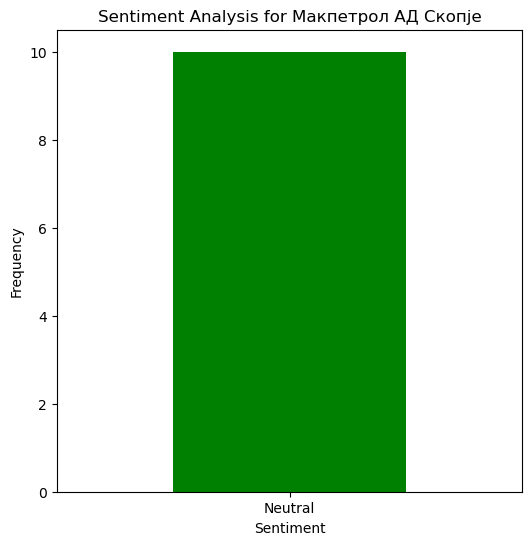

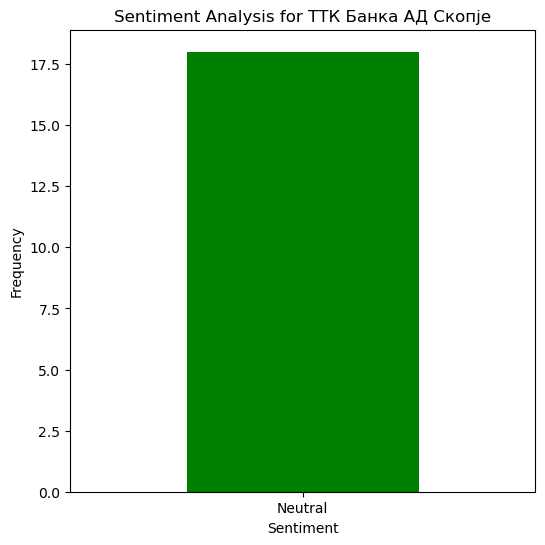

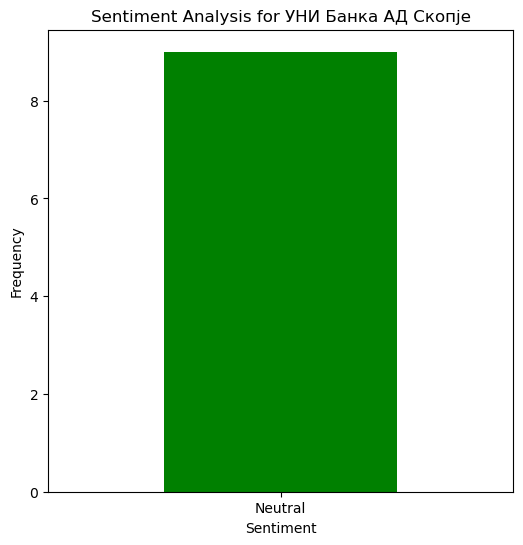

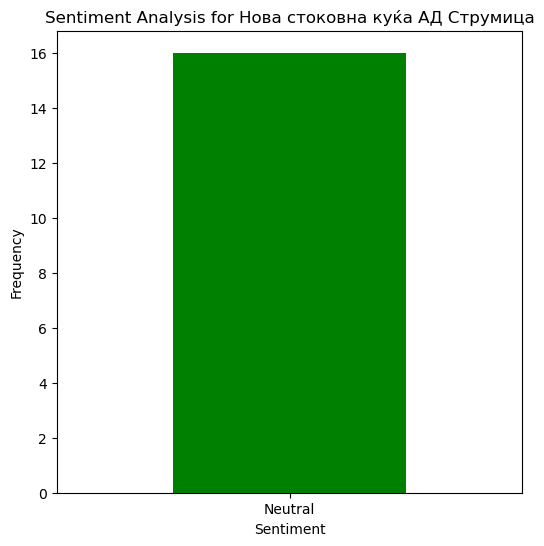

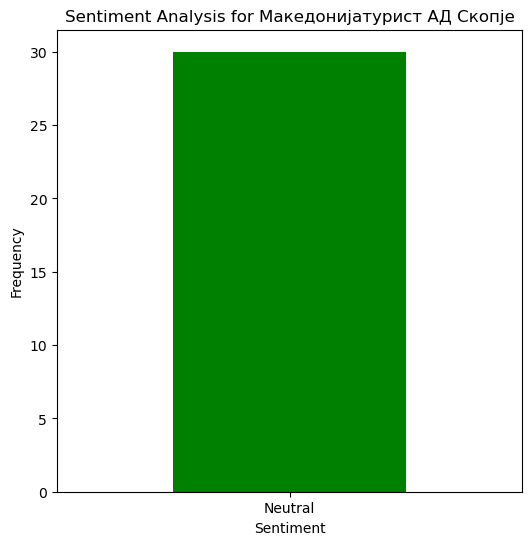

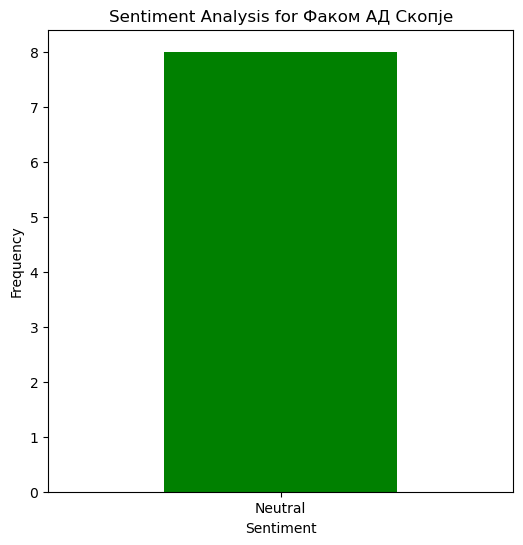

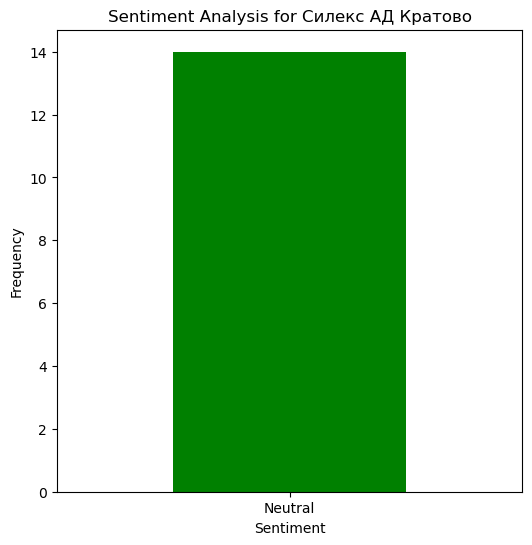

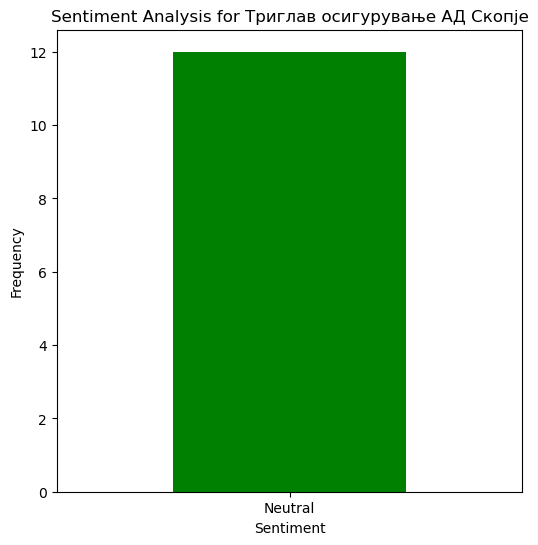

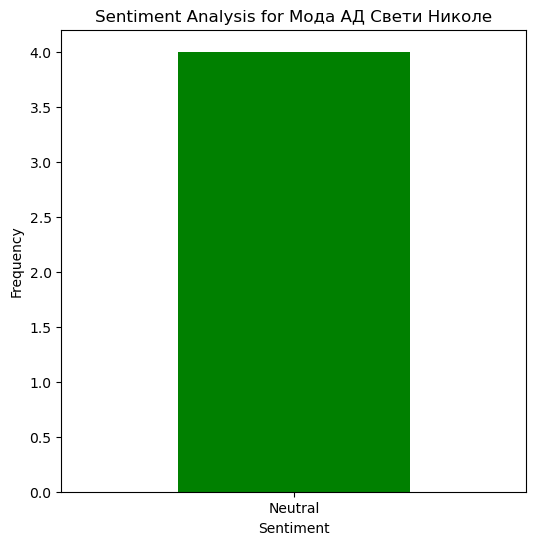

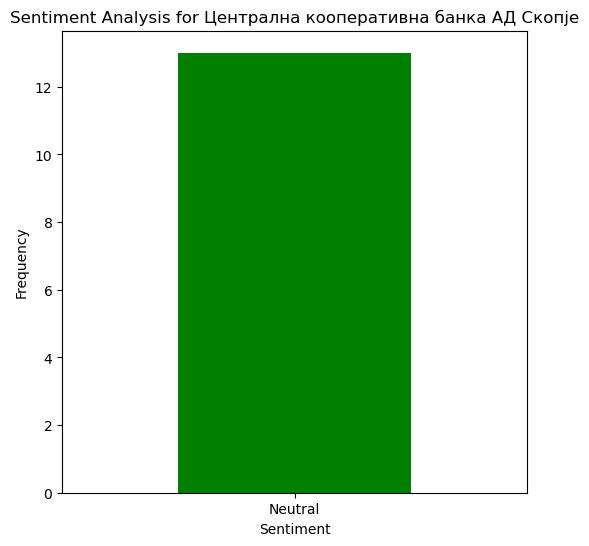

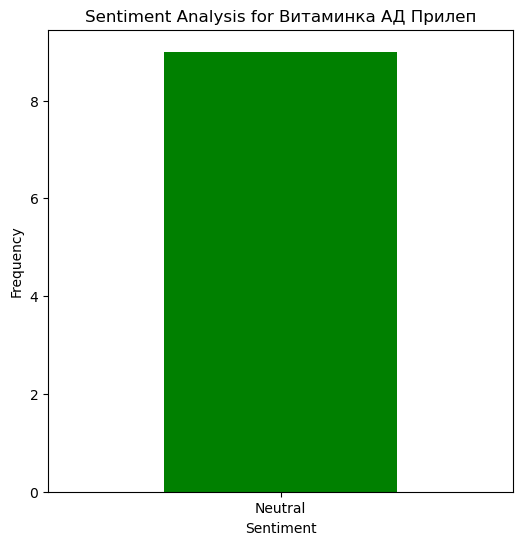

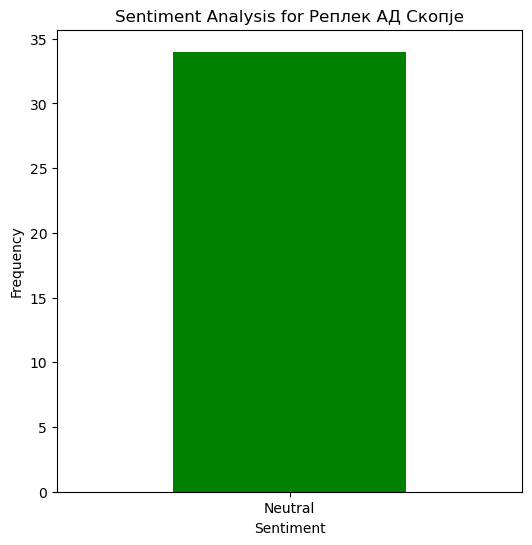

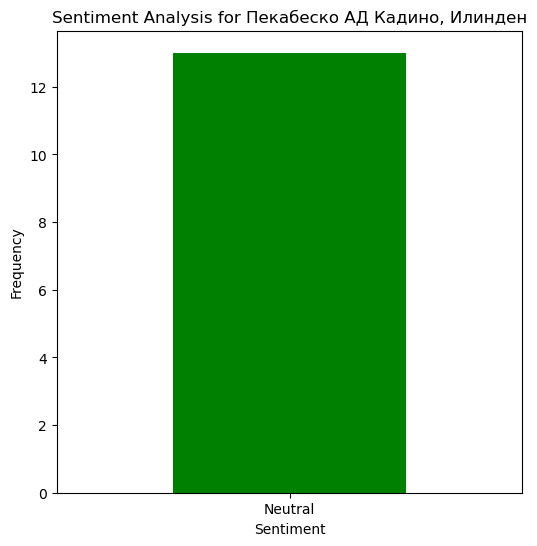

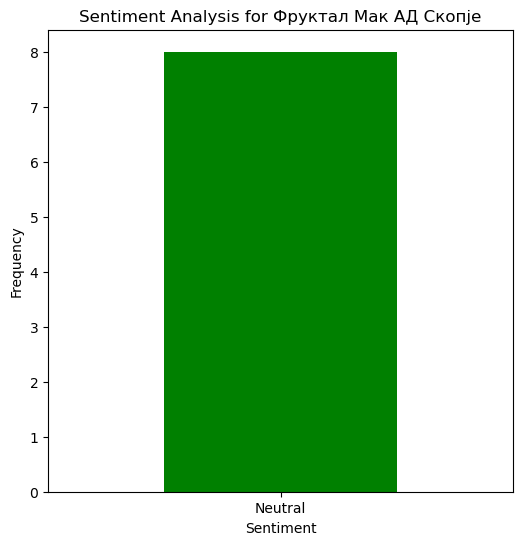

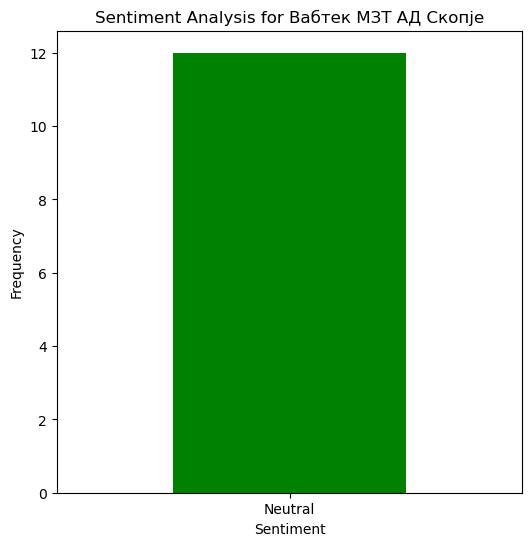

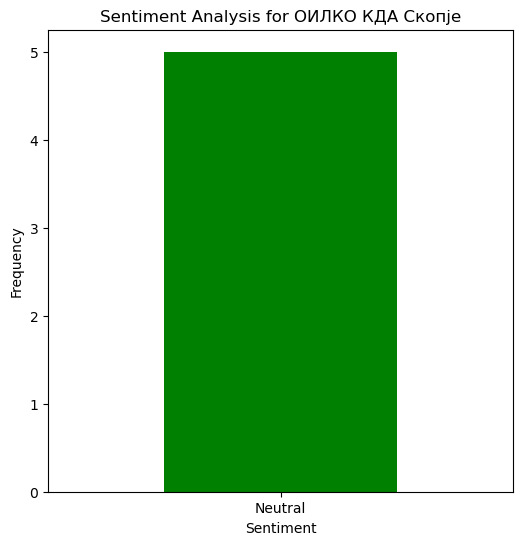

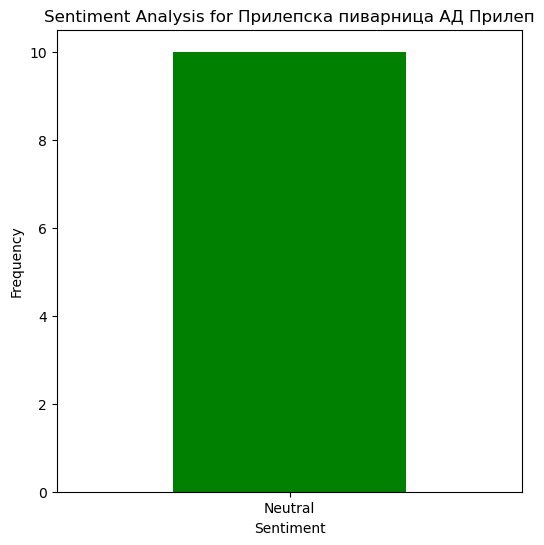

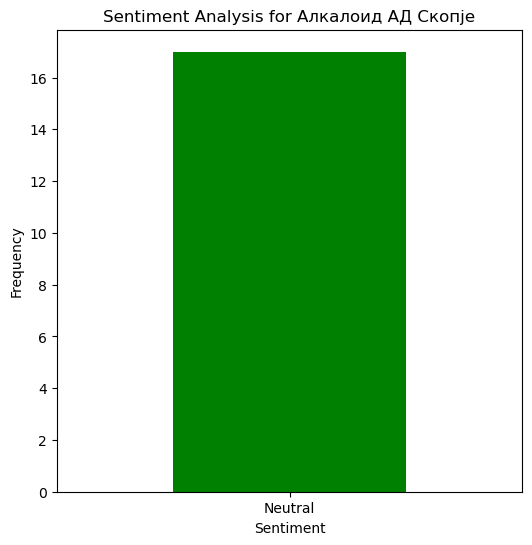

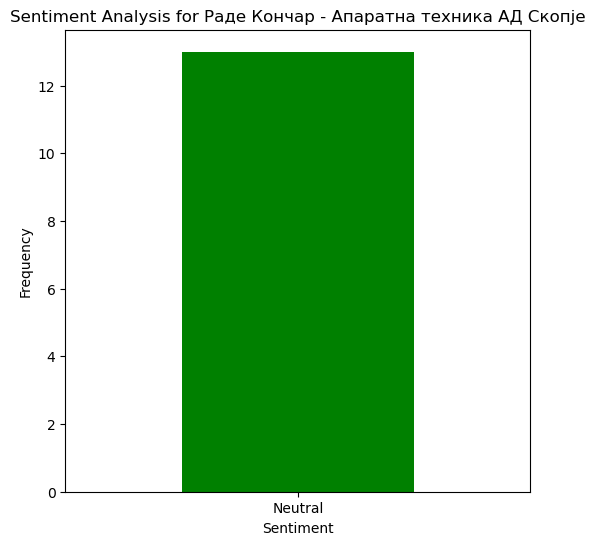

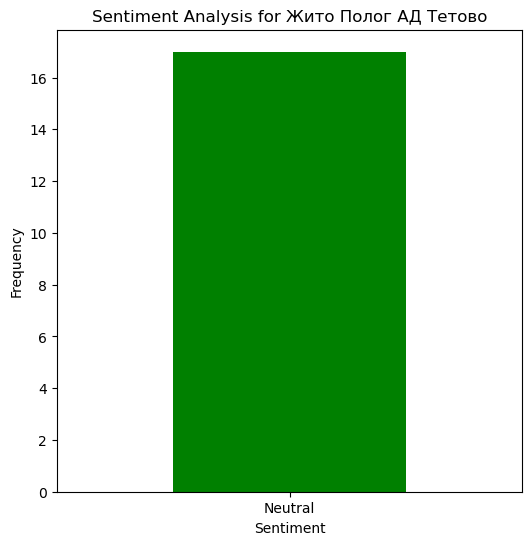

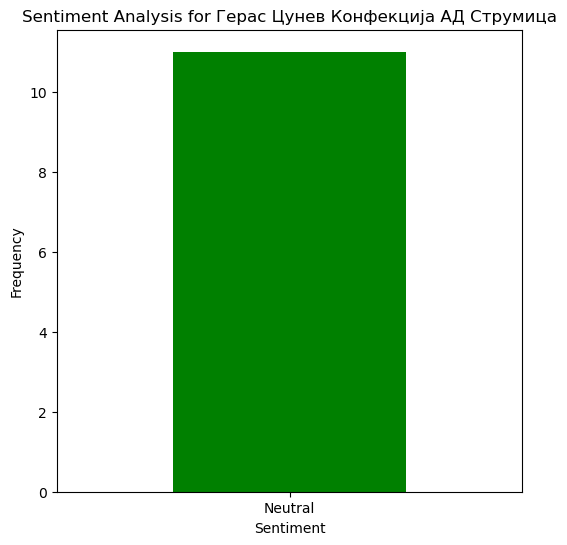

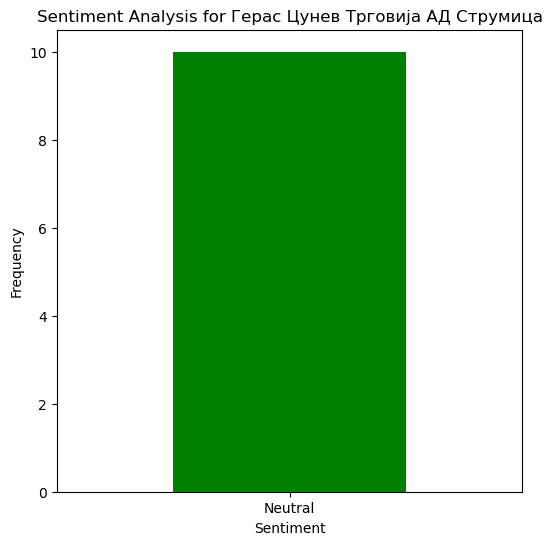

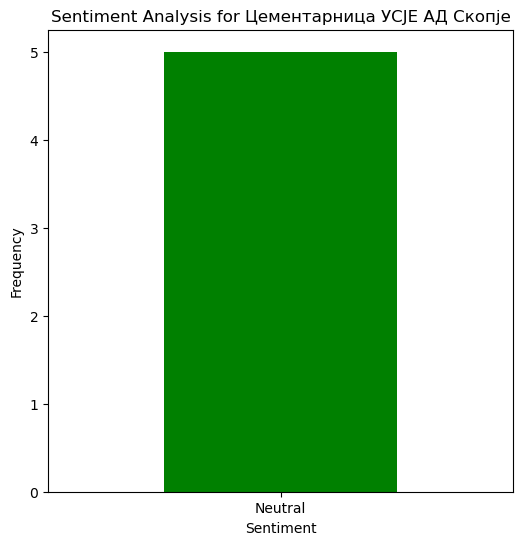

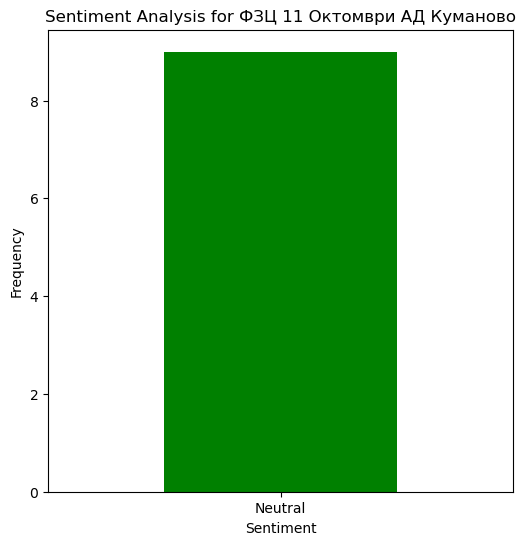

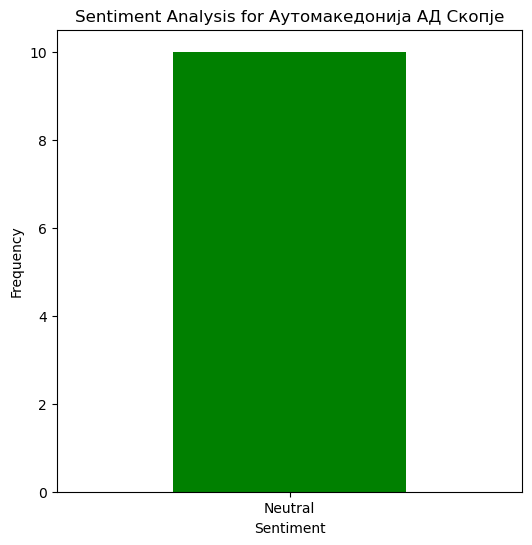

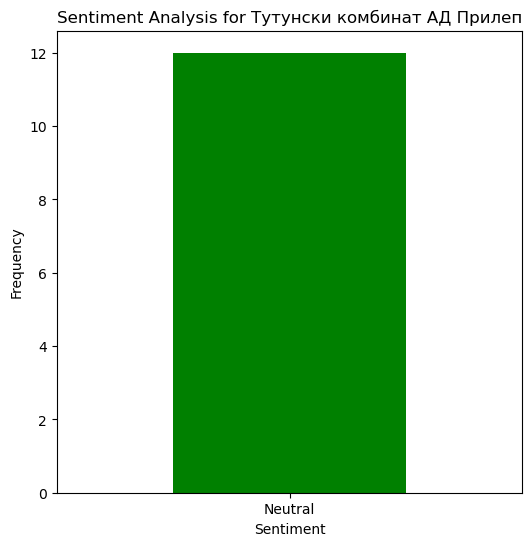

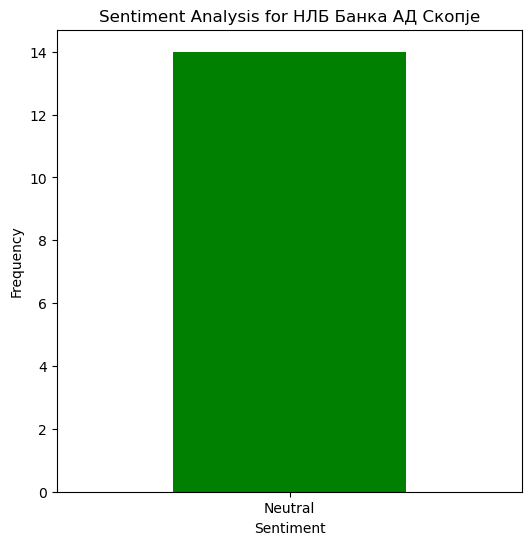

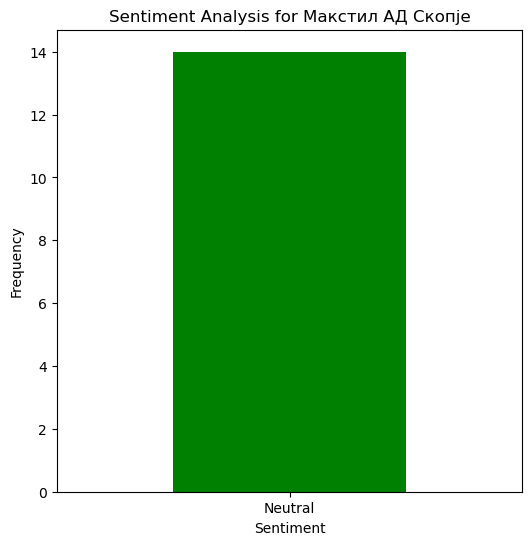

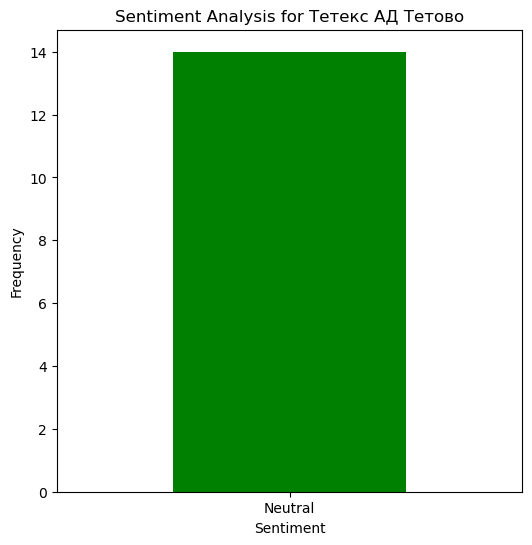

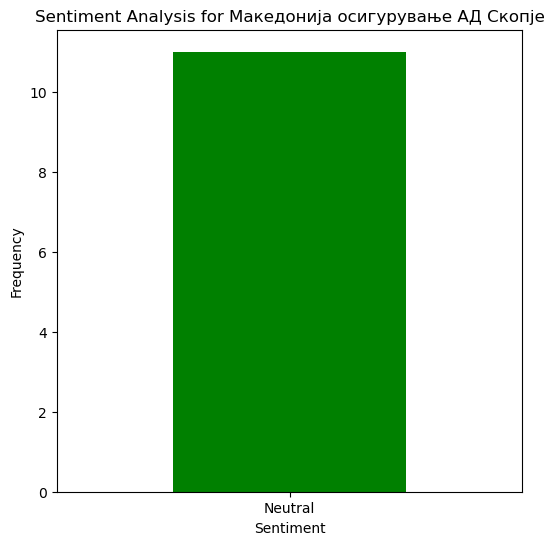

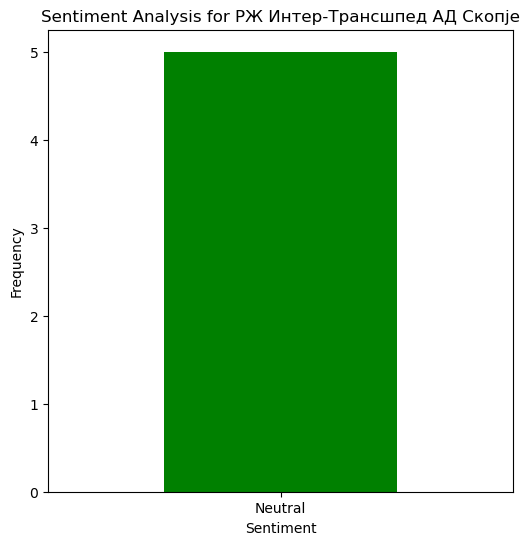

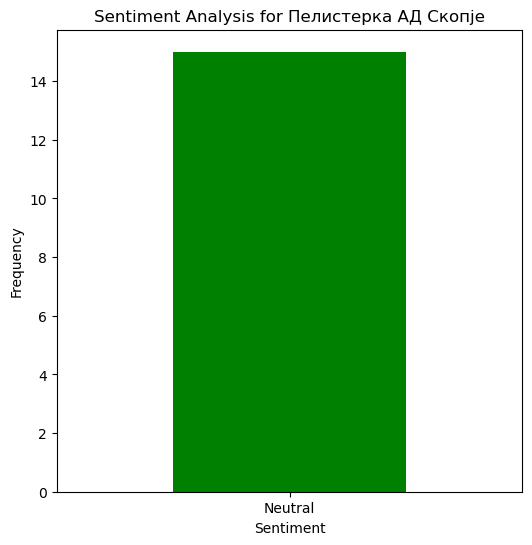

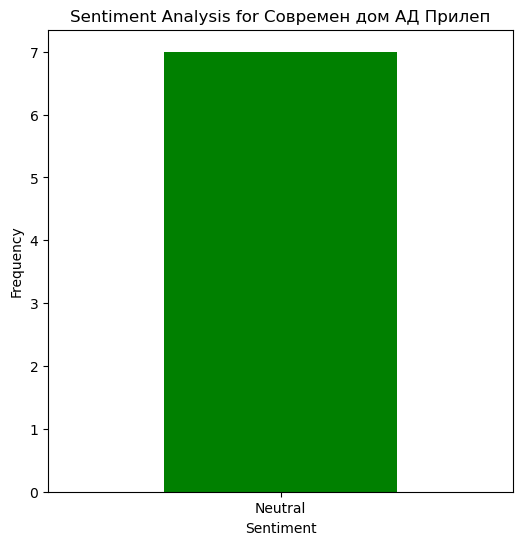

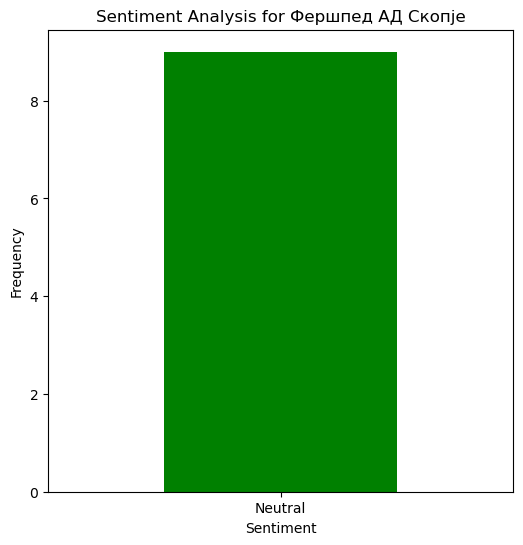

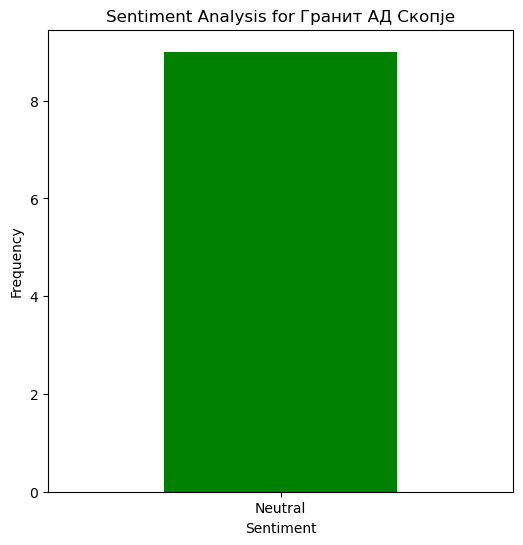

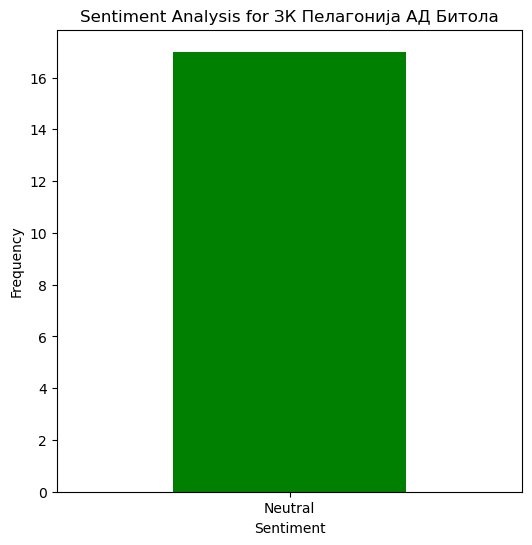

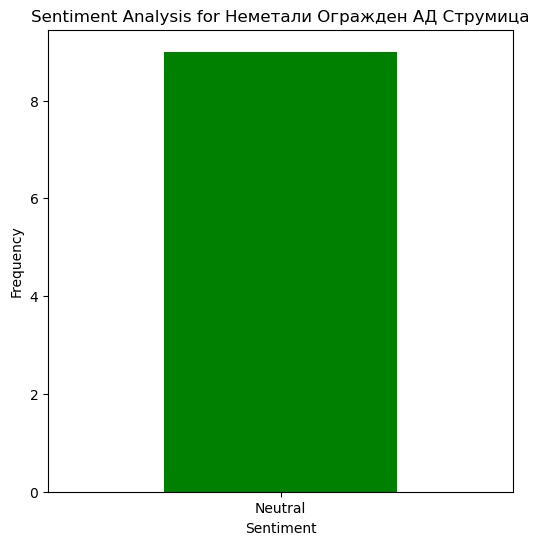

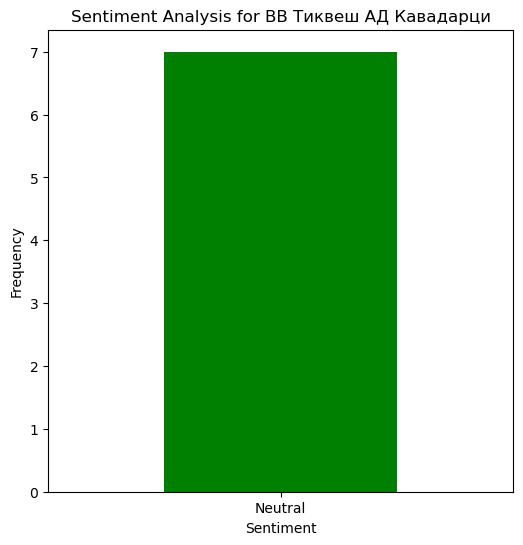

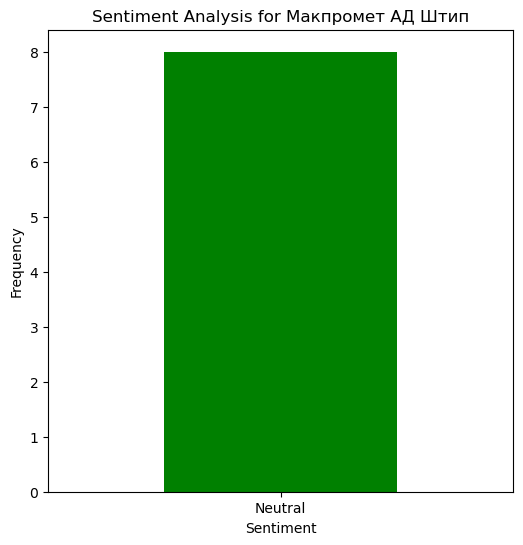

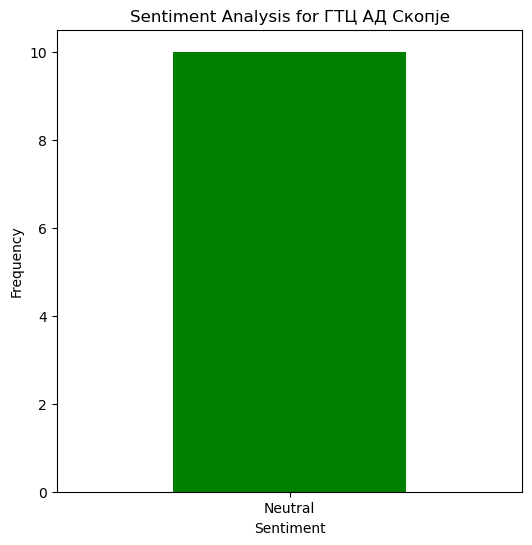

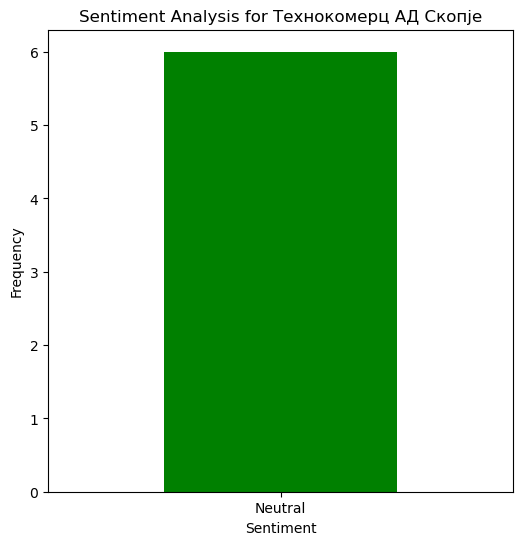

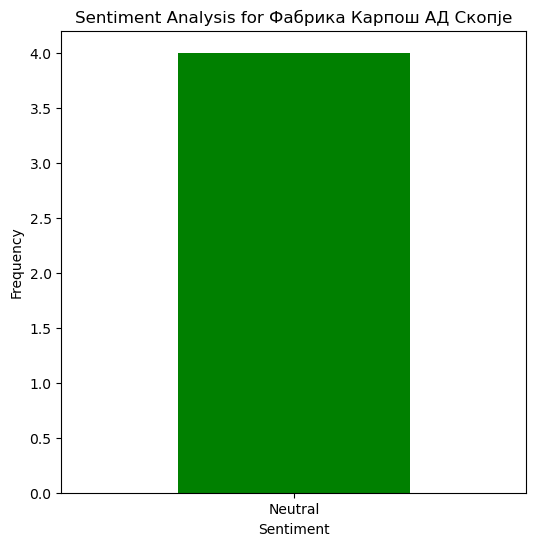

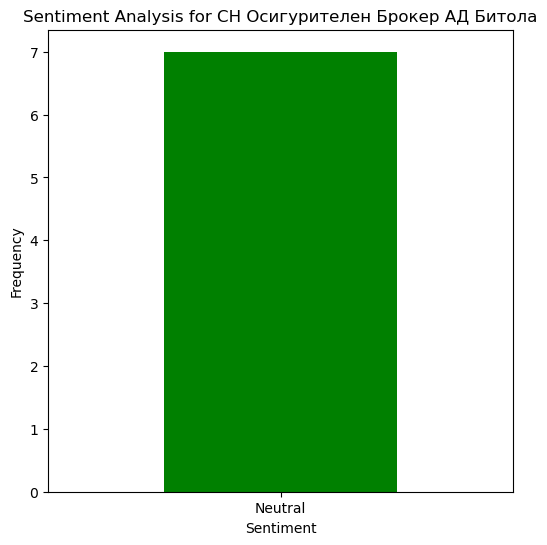

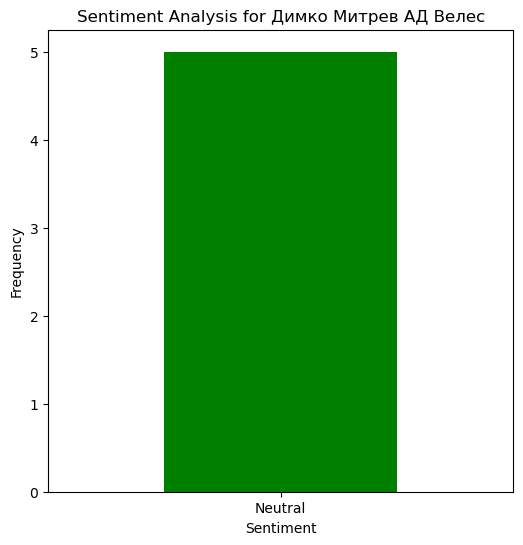

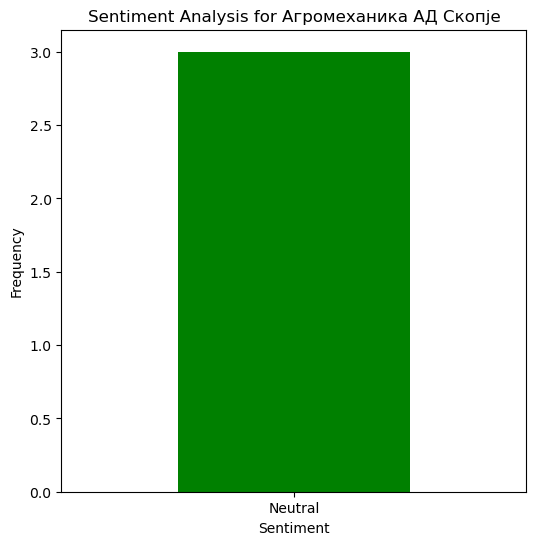

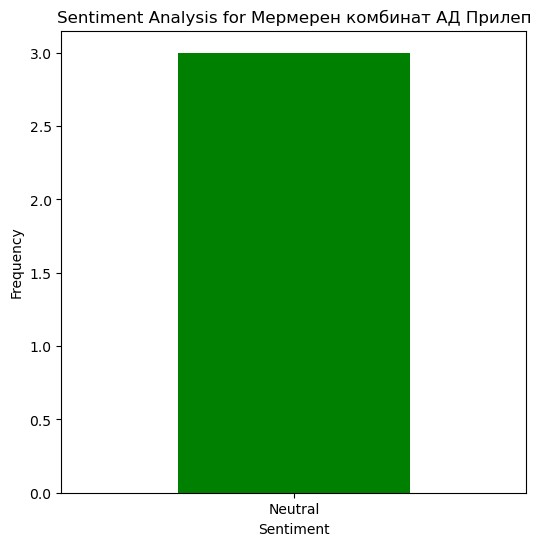

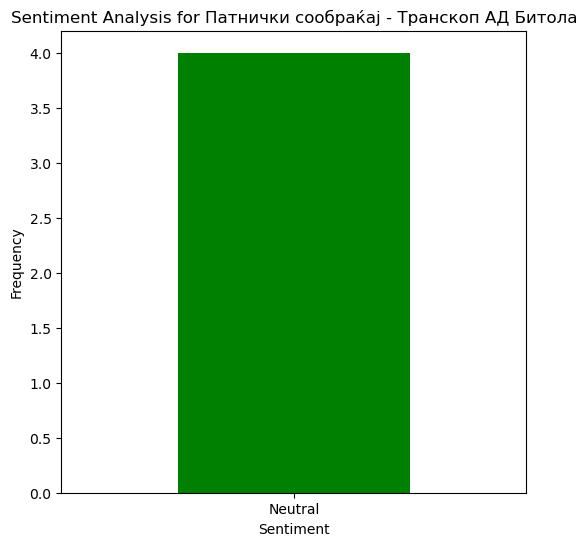

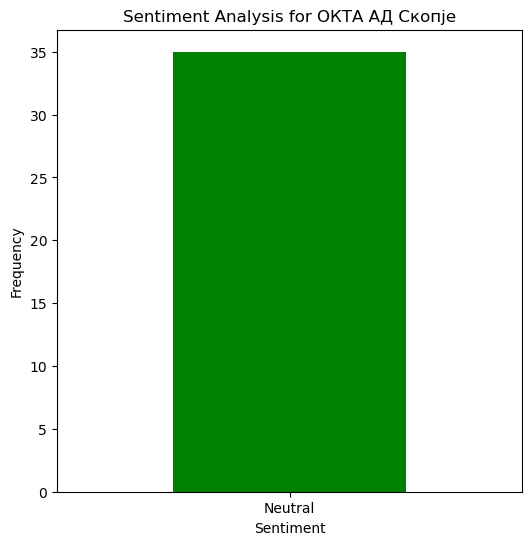

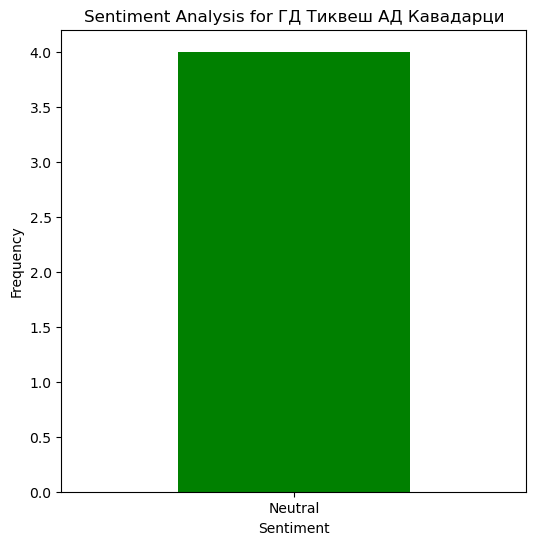

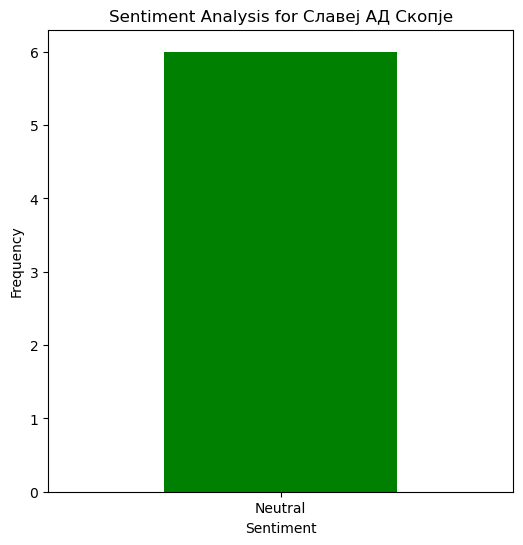

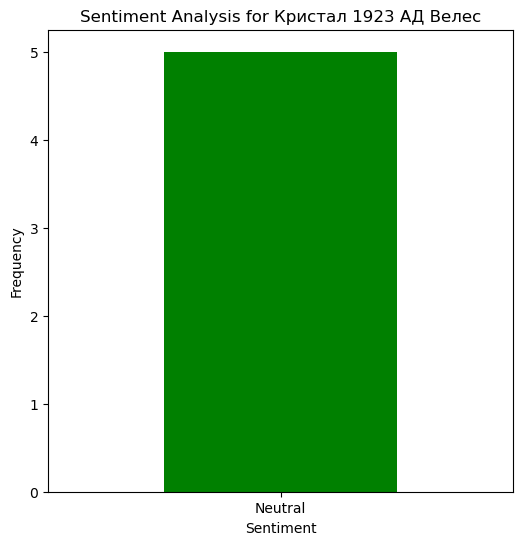

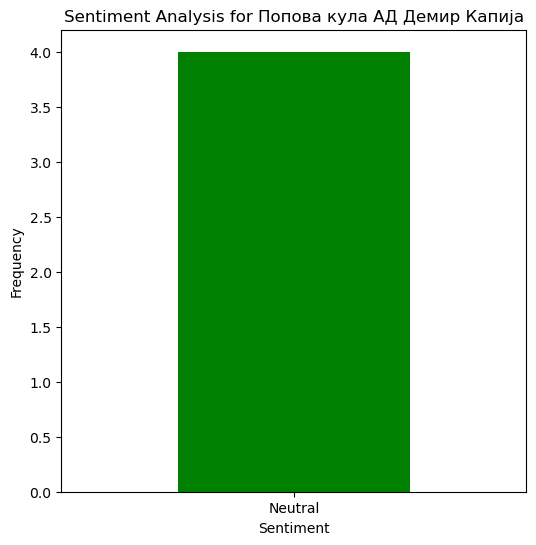

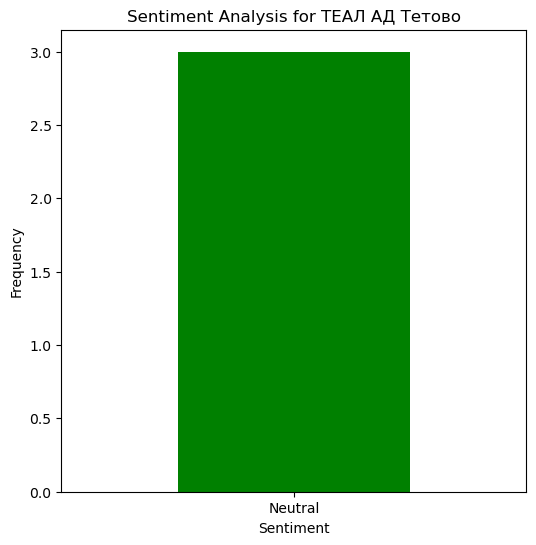

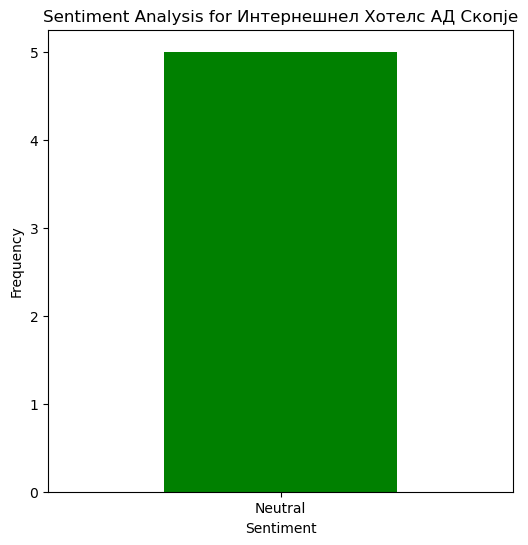

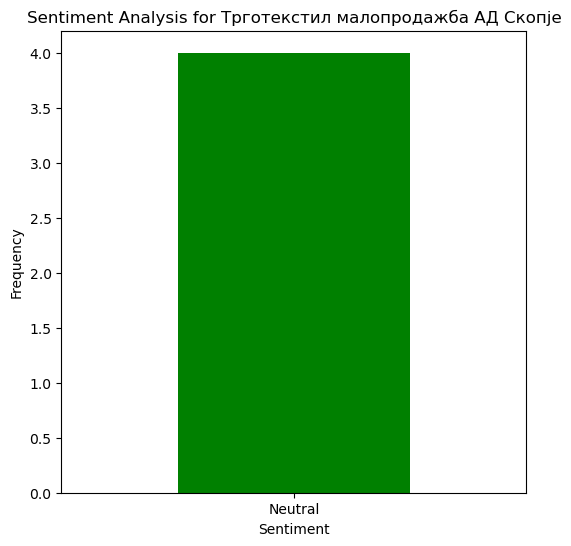

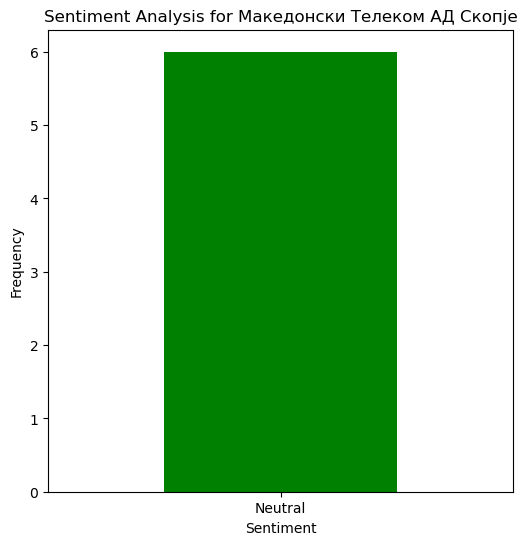

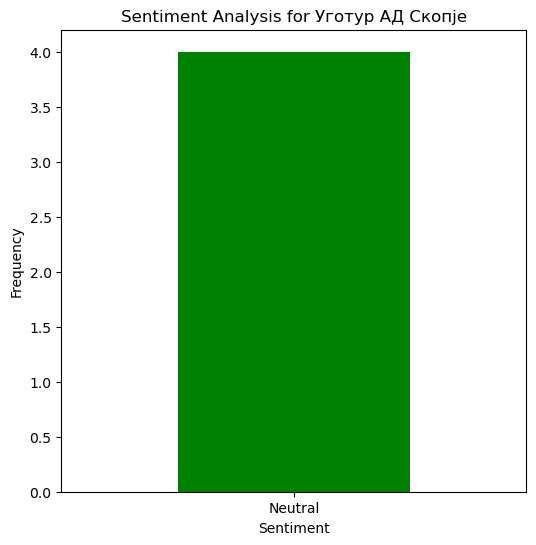

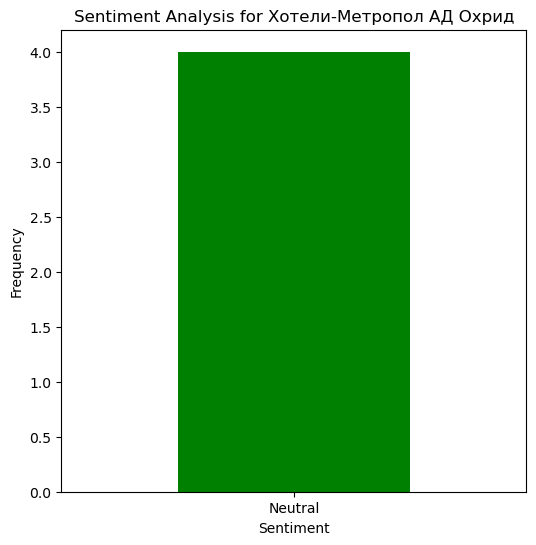

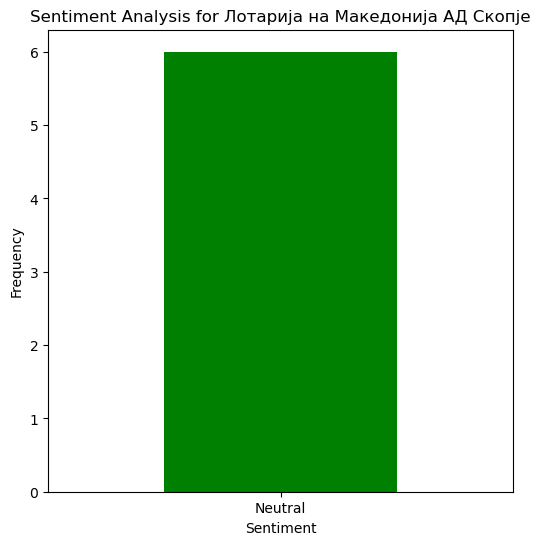

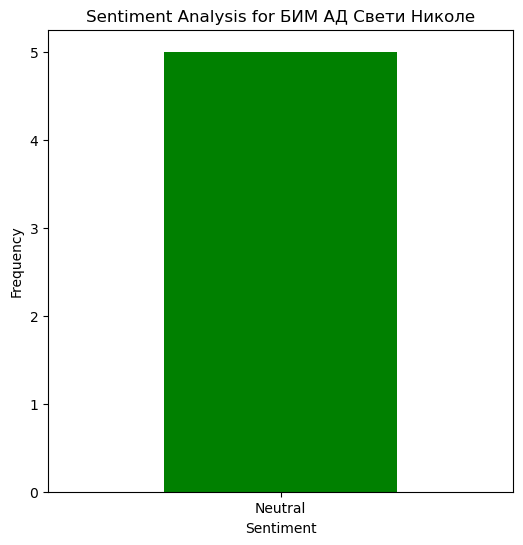

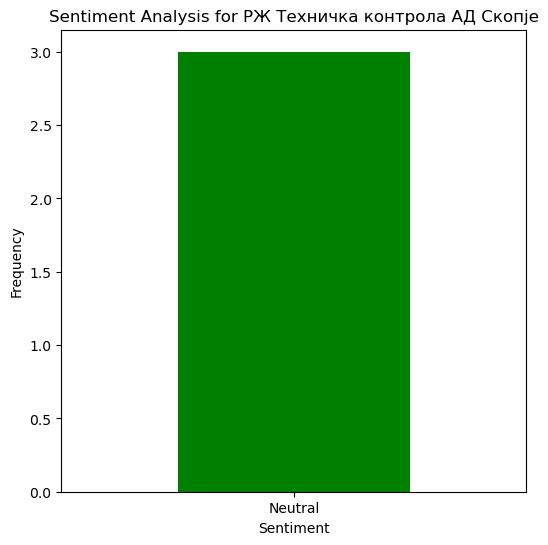

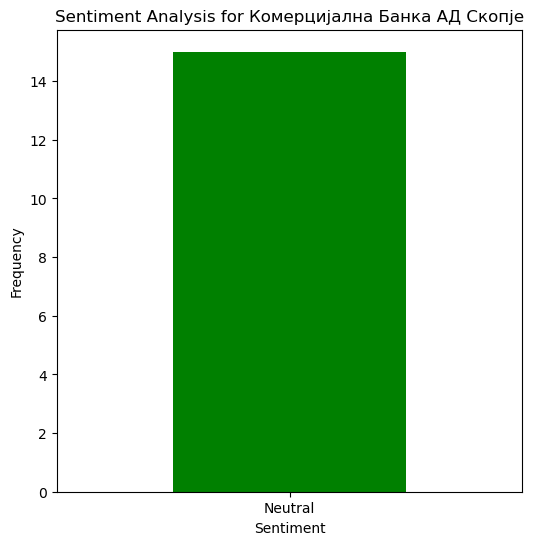

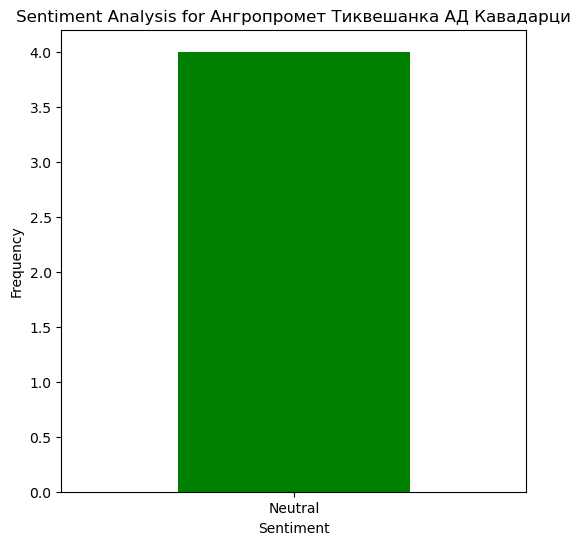

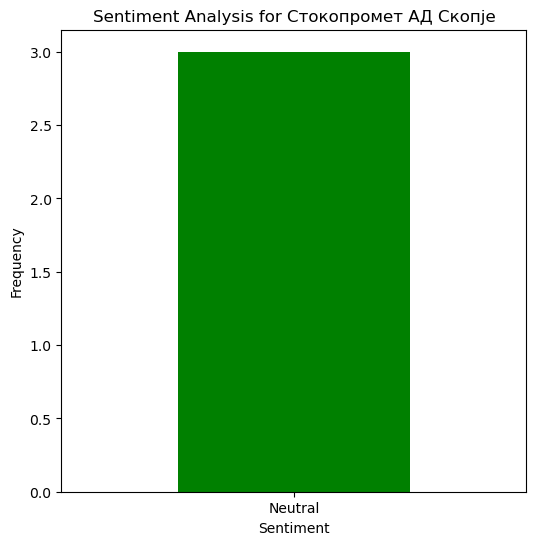

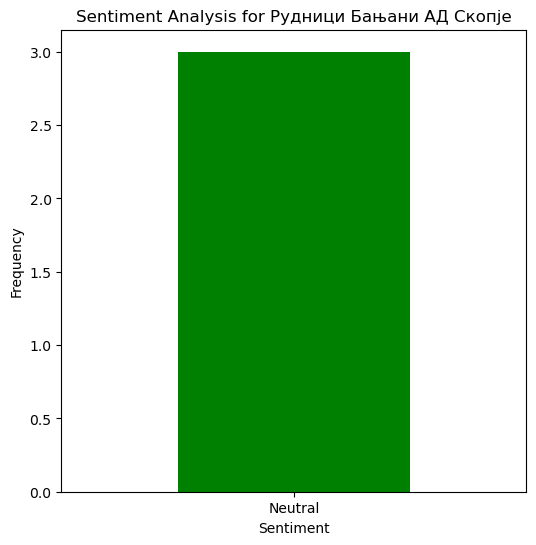

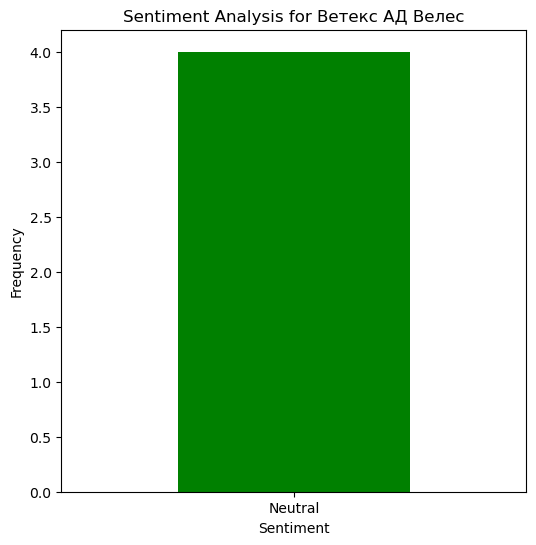

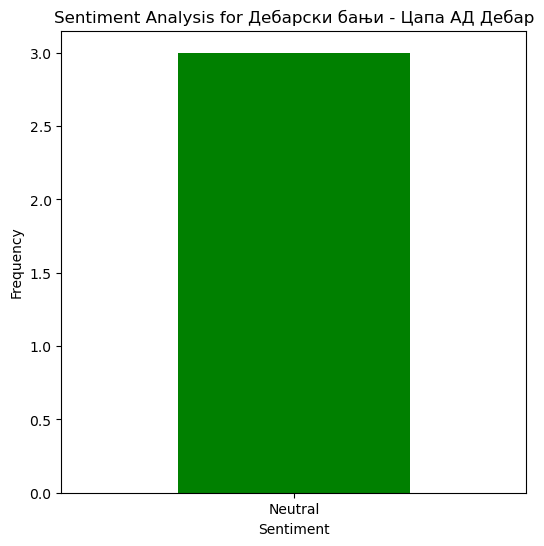

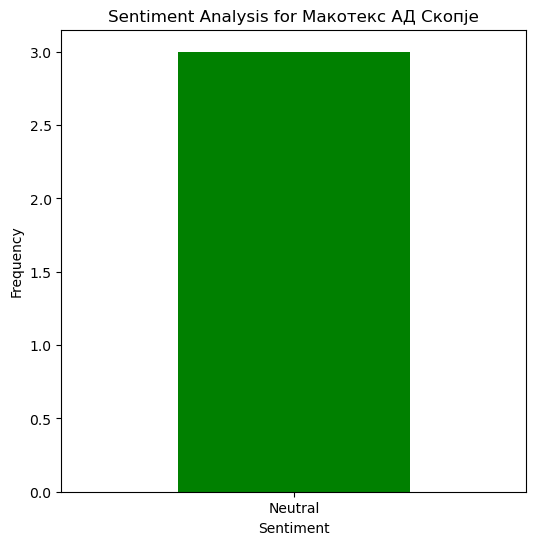

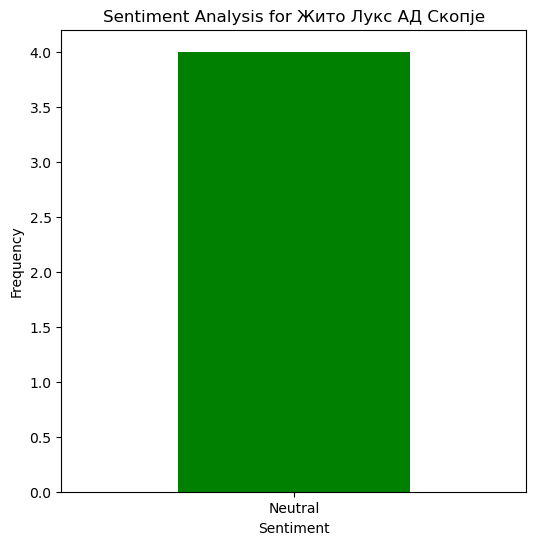

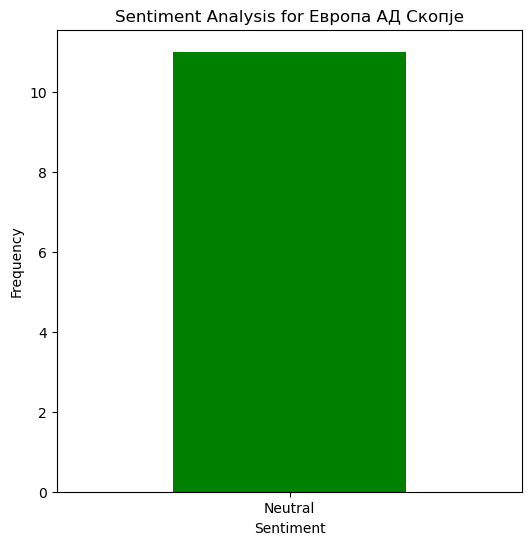

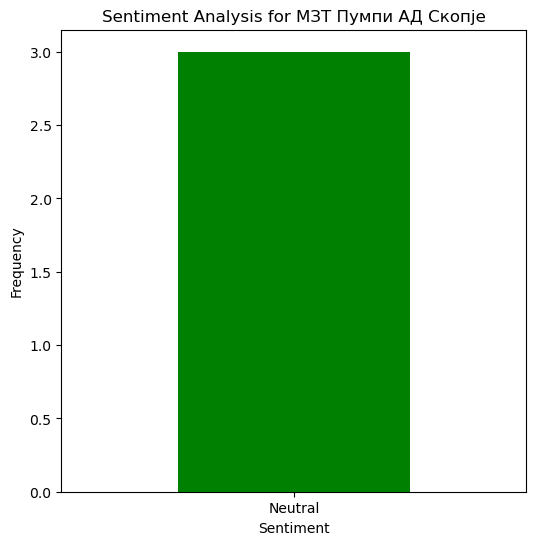

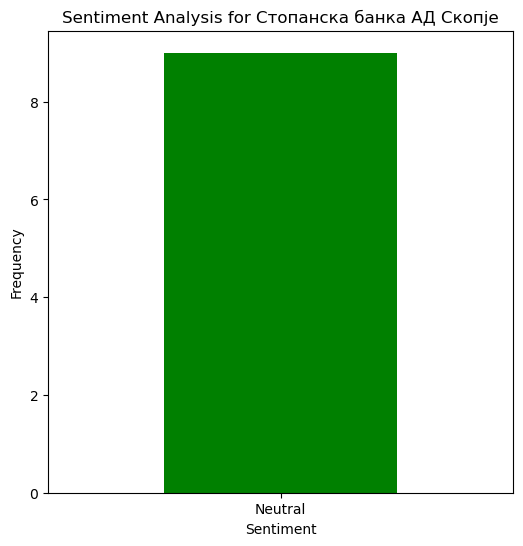

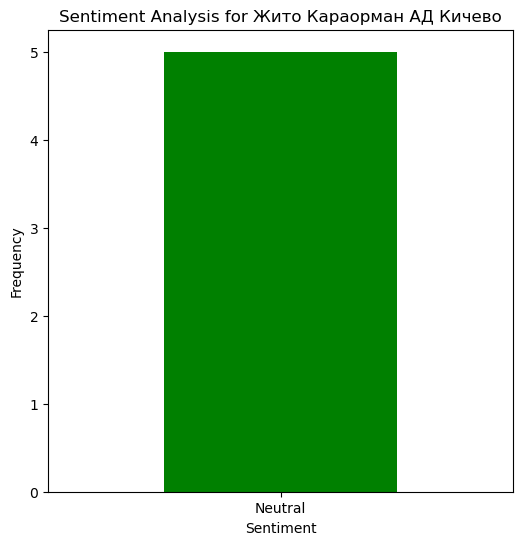

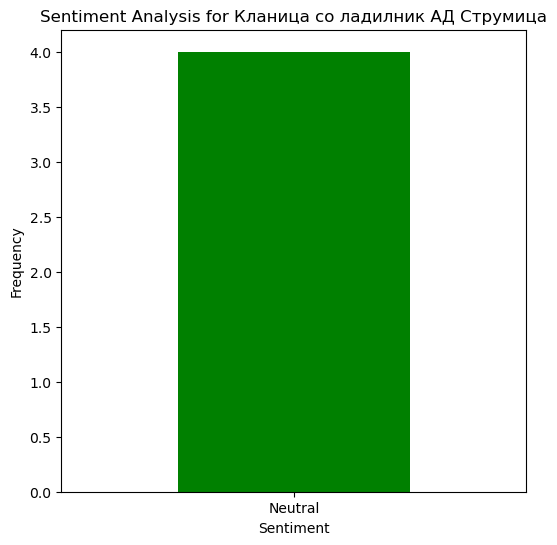

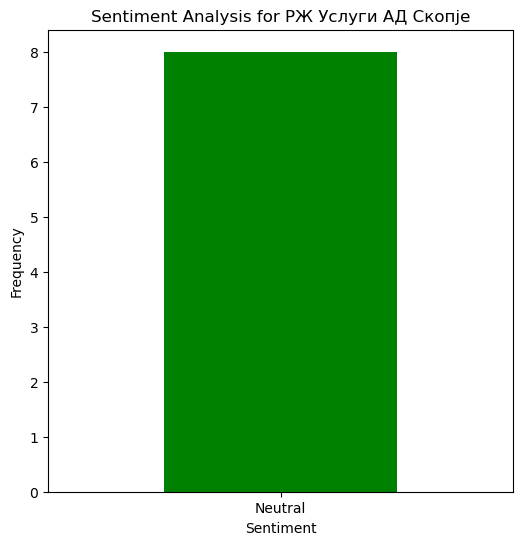

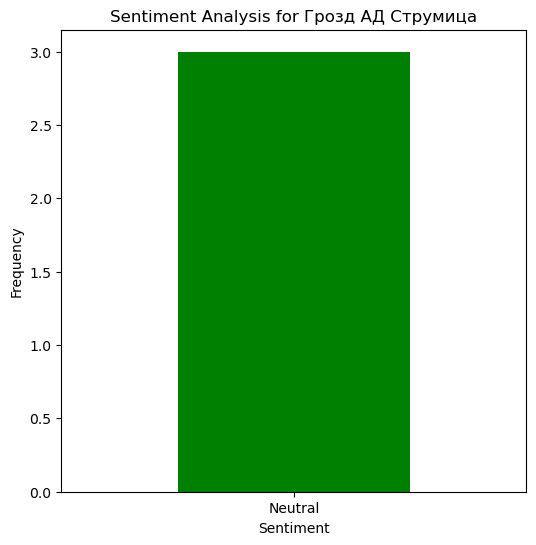

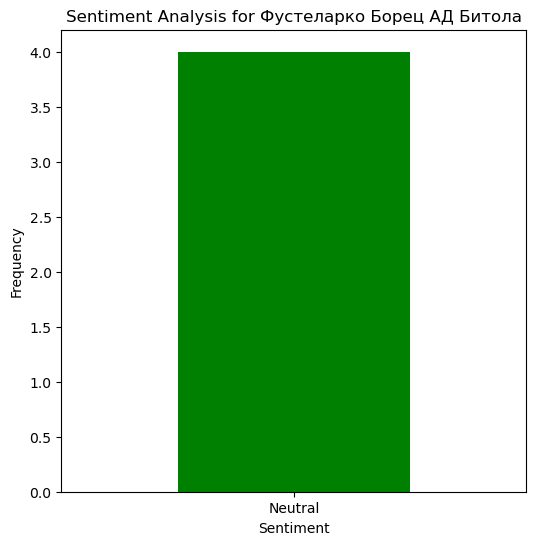

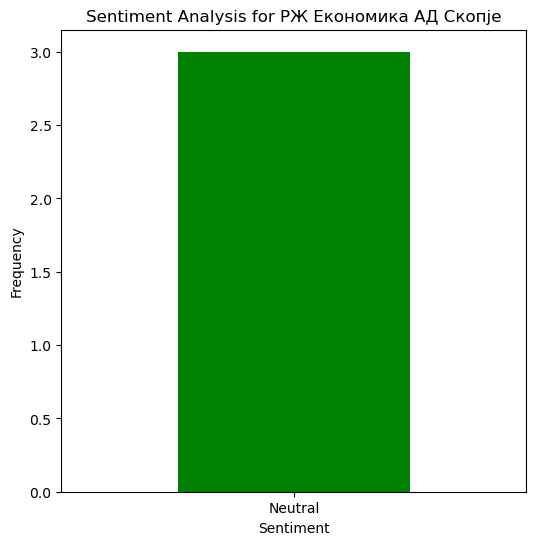

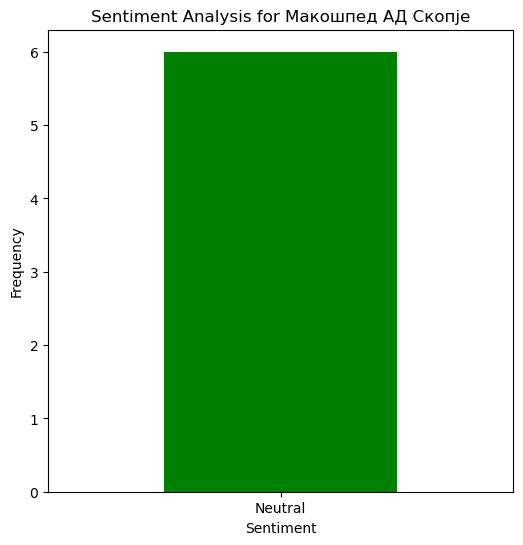

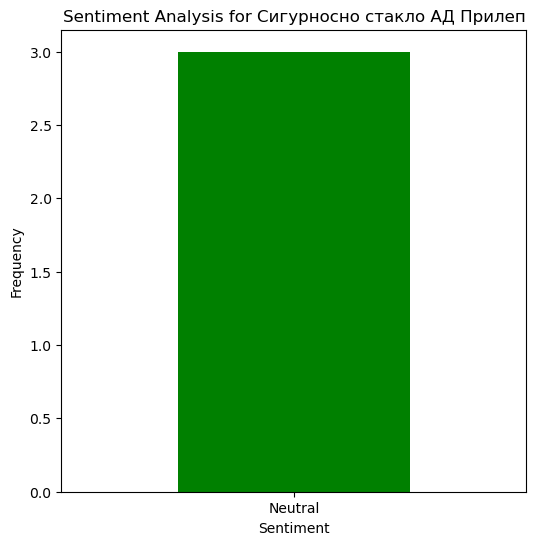

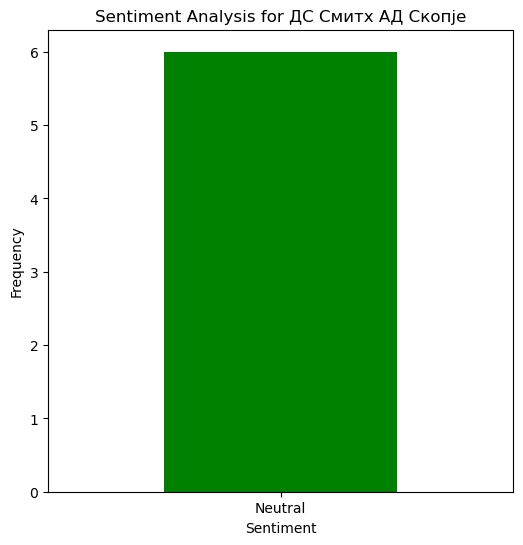

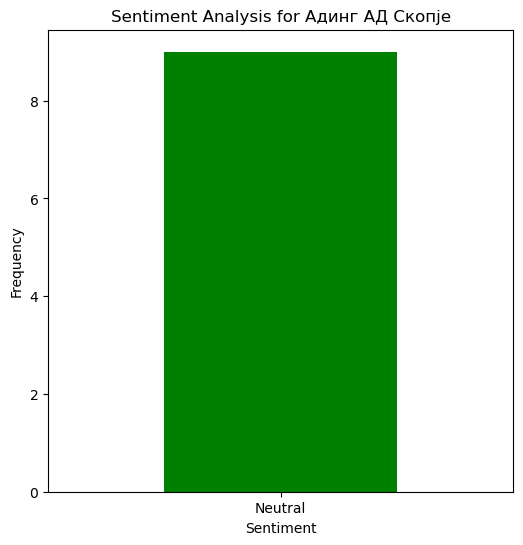

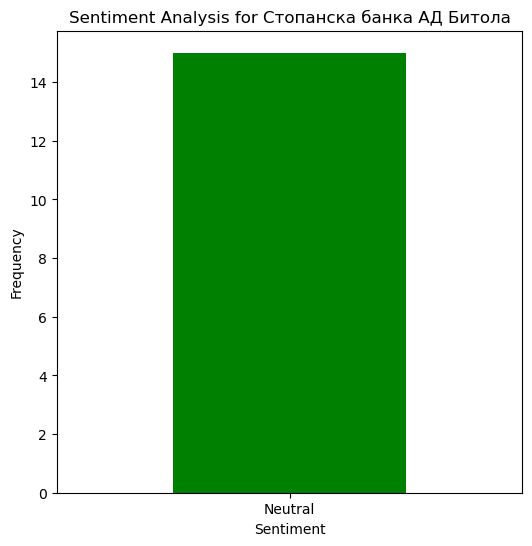

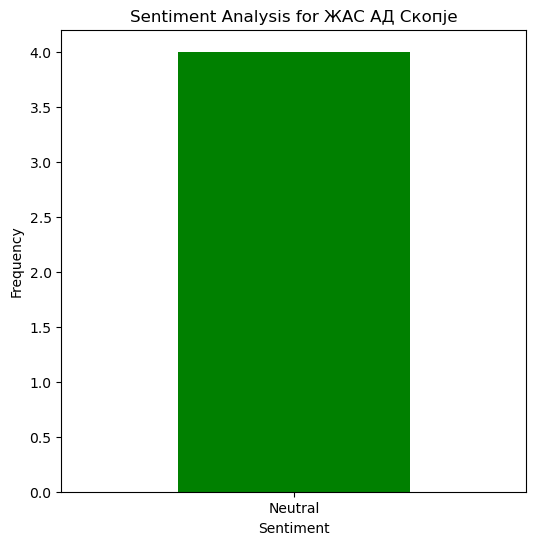

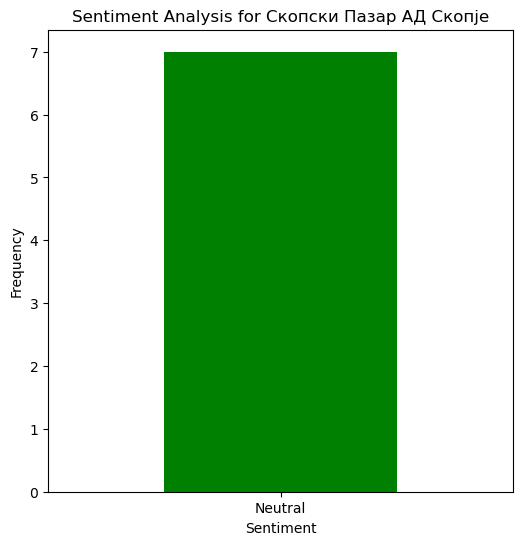

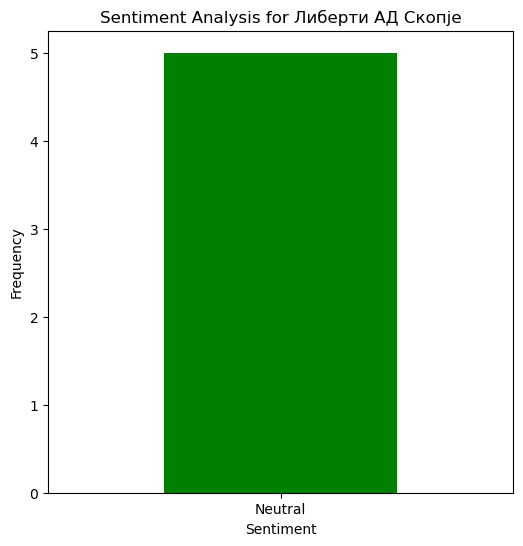

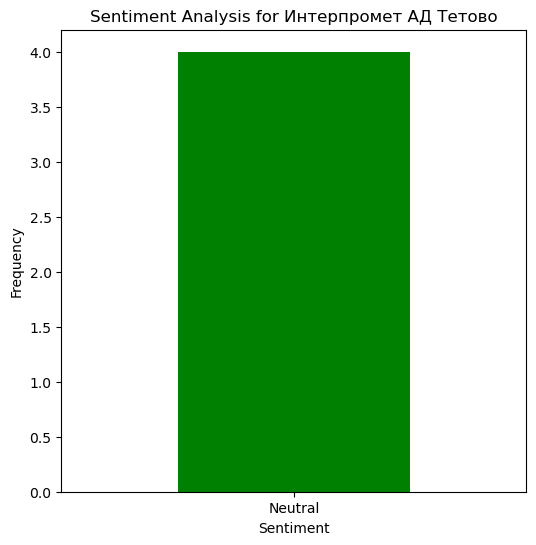

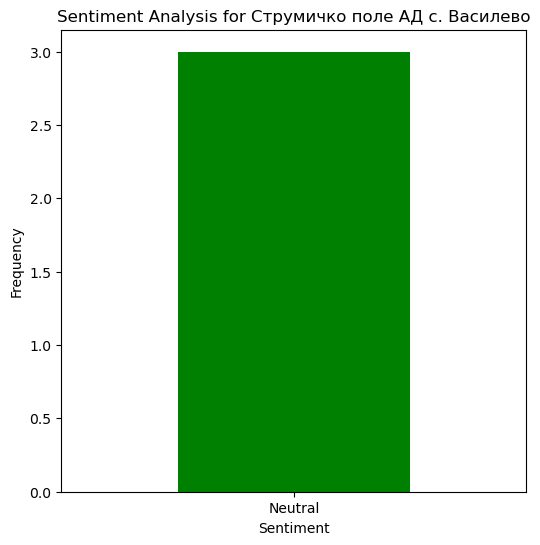

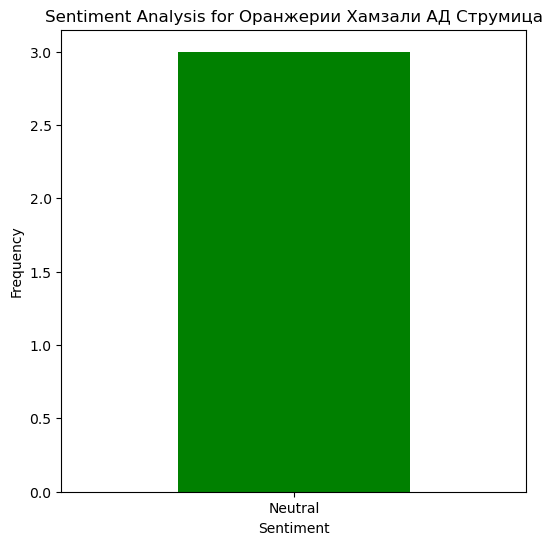

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer

df = pd.read_csv('seinet_data.csv')

sia = SentimentIntensityAnalyzer()

def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']

    if sentiment_score > 0:
        return 'Positive'
    elif sentiment_score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Title'].apply(get_sentiment)

companies = df['Company'].unique()

for company in companies:
    company_df = df[df['Company'] == company]

    
    sentiment_counts = company_df['Sentiment'].value_counts()

    plt.figure(figsize=(6, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'red', 'yellow'])
    plt.title(f'Sentiment Analysis for {company}')
    plt.xlabel('Sentiment')
    plt.ylabel('Frequency')
    plt.xticks(rotation=0)
    plt.show()

    company_df.to_csv(f'{company}_sentiment_analysis.csv', index=False)


In [13]:
num_companies = df['Company'].nunique()
print(f'Број на различни компании: {num_companies}')


Број на различни компании: 89
